# Zomato Data Anaylysis

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Creating Data Frame

In [2]:
df = pd.read_csv("Zomato_data.csv")

## Checking the data

In [4]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


## Data Cleaning

In [5]:
print(df.dtypes)

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
approx_cost(for two people)     int64
listed_in(type)                object
dtype: object


### Convert the data type of rate column

In [6]:
def convertRateColumn(value):
    value = str(value).split("/")[0]
    return float(value)
df['rate'] = df['rate'].apply(convertRateColumn)

In [7]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


### Checking Null / Missing Value

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## Problem 1: Find the majority type of resturant

In [9]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Resturant Type')

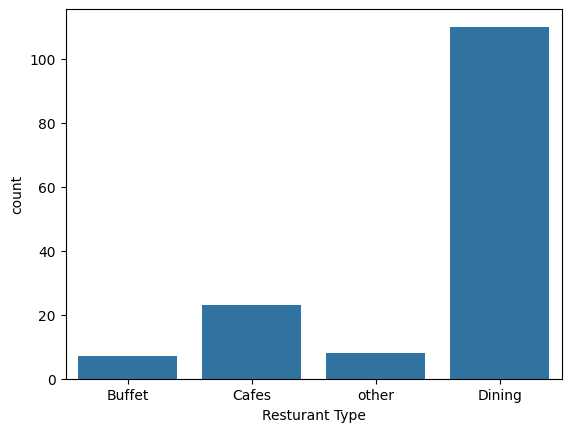

In [13]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Resturant Type")

### Conclusion - Maximum Resturant Falls under "Dinning" Category

## Problem 2 : Find No. of votes for each resturant category

Text(0, 0.5, 'Votes')

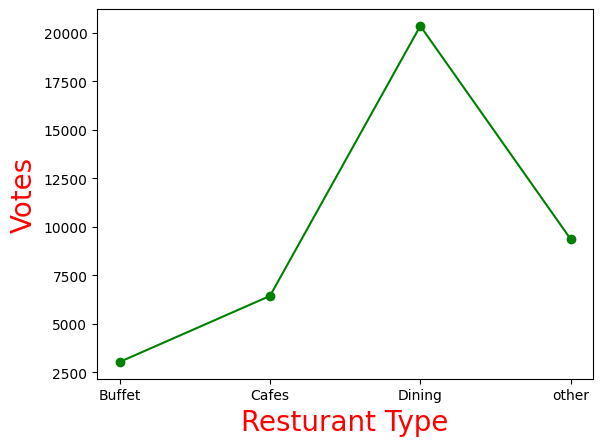

In [22]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result,c="green",marker="o")
plt.xlabel("Resturant Type",c="red",size=20)
plt.ylabel("Votes",c="red",size=20)

### Conclusion : Dinning Resturant has recieved maximum votes

## Problem 3 : rating that majority of restaurant have received

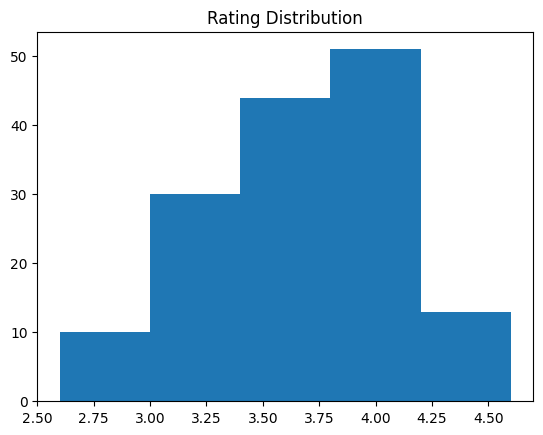

In [23]:
plt.hist(df['rate'],bins=5)
plt.title("Rating Distribution")
plt.show()

### Conclusion : Majority of rating is between 3.5 - 4

## Problem 4 : Average Spending of couple for each order

In [24]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

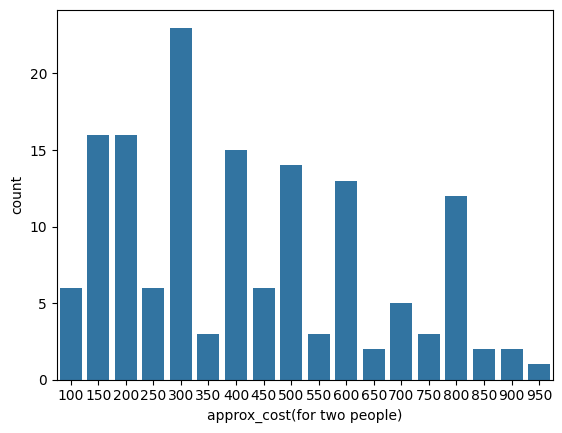

In [25]:
sns.countplot(x=df['approx_cost(for two people)'])

### Conclusion : Majority couple prefer resturants with approx cost of 300 Rs

## Problem 5 : hich mode(online or offline) has received maximum rating?


In [26]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

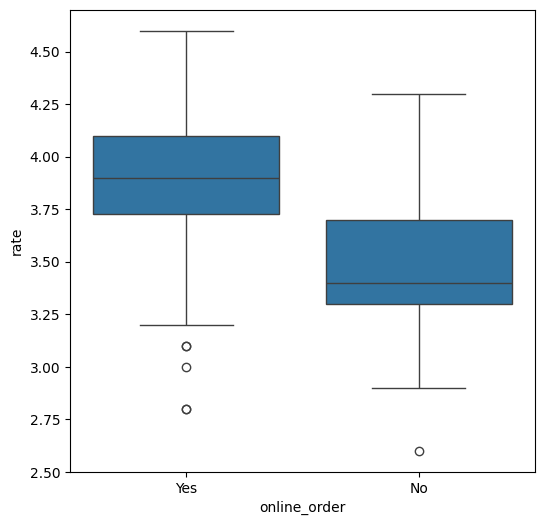

In [27]:
plt.figure(figsize=(6,6))
sns.boxplot(x ='online_order', y = 'rate', data = df)

### Conclusion : Online receive higher rating than offline rating

## Problem 6 : Which type id restaurant has received more offline orders

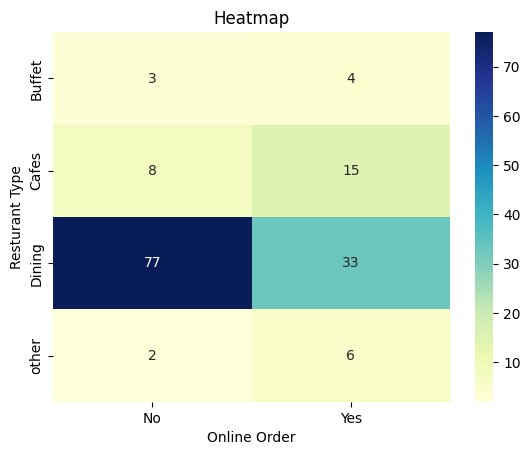

In [29]:
pivot_table = df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt="d")
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Resturant Type")
plt.show()

### Conclusion : Dinning primary gets more ofline orders , while cafes get more online order. This shows user prefers orders in person in dinning resturants , but prefer ordering online from cafes